In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torchvision

In [11]:
#Data Loading: Load the MNIST dataset using data loading utilities.
data = np.load('mnist.npz')
train_images = data['x_train']
train_labels = data['y_train']
test_images = data['x_test']
test_labels = data['y_test']

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = np.expand_dims(train_images, axis=1)
test_images = np.expand_dims(test_images, axis=1)

train_images = torch.tensor(train_images)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_images = torch.tensor(test_images)
test_labels = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [12]:
#Model Definition: Create a neural network model for digit recognition. You can use a simple feedforward neural network.
class DigitRecognizer(nn.Module):
    def __init__(self):
        super(DigitRecognizer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

model = DigitRecognizer()

In [13]:
#Training: Train your model on the training set of the MNIST dataset. Use an appropriate loss function and optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}")


Epoch [1/5], Loss: 0.2933
Epoch [2/5], Loss: 0.1215
Epoch [3/5], Loss: 0.0926
Epoch [4/5], Loss: 0.0711
Epoch [5/5], Loss: 0.0615


In [14]:
#Validation: Evaluate the performance of your model on a separate validation set. Report metrics such as accuracy.
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model: {100 * correct / total:.2f}%')

Accuracy of the model: 97.33%


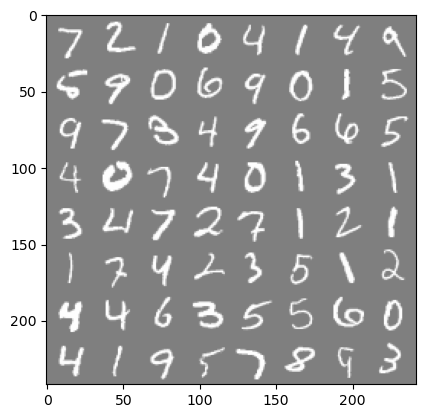

Predicted:      7     2     1     0     4     1     4     9
Actual:      7     2     1     0     4     1     4     9


In [15]:
#Testing: Test your trained model on a test set that was not used during training or validation.
#Visualization: Visualize a few input images along with their corresponding predicted and actual labels.
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(8)))
print('Actual: ', ' '.join('%5s' % labels[j].item() for j in range(8)))